# Thinking of Turnover As A Binary Classification Problem

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


# Importing Data

In [3]:
data_source = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data = data_source.copy()

In [4]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
#checking for outliers and unecessary columns:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
data.describe(include="O")

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [6]:
data = data.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [7]:
data.isnull().sum().sum()

0

In [8]:
#splitting up columns by type
numerical=[col for col in data.columns 
           if data[col].dtype=='int64'and data[col].nunique()>9]
nominal_categorical = [col for col in data.columns 
               if data[col].dtype=='object']
ordinal_categorical = list(set(data.columns)-set(numerical)-set(nominal_categorical))

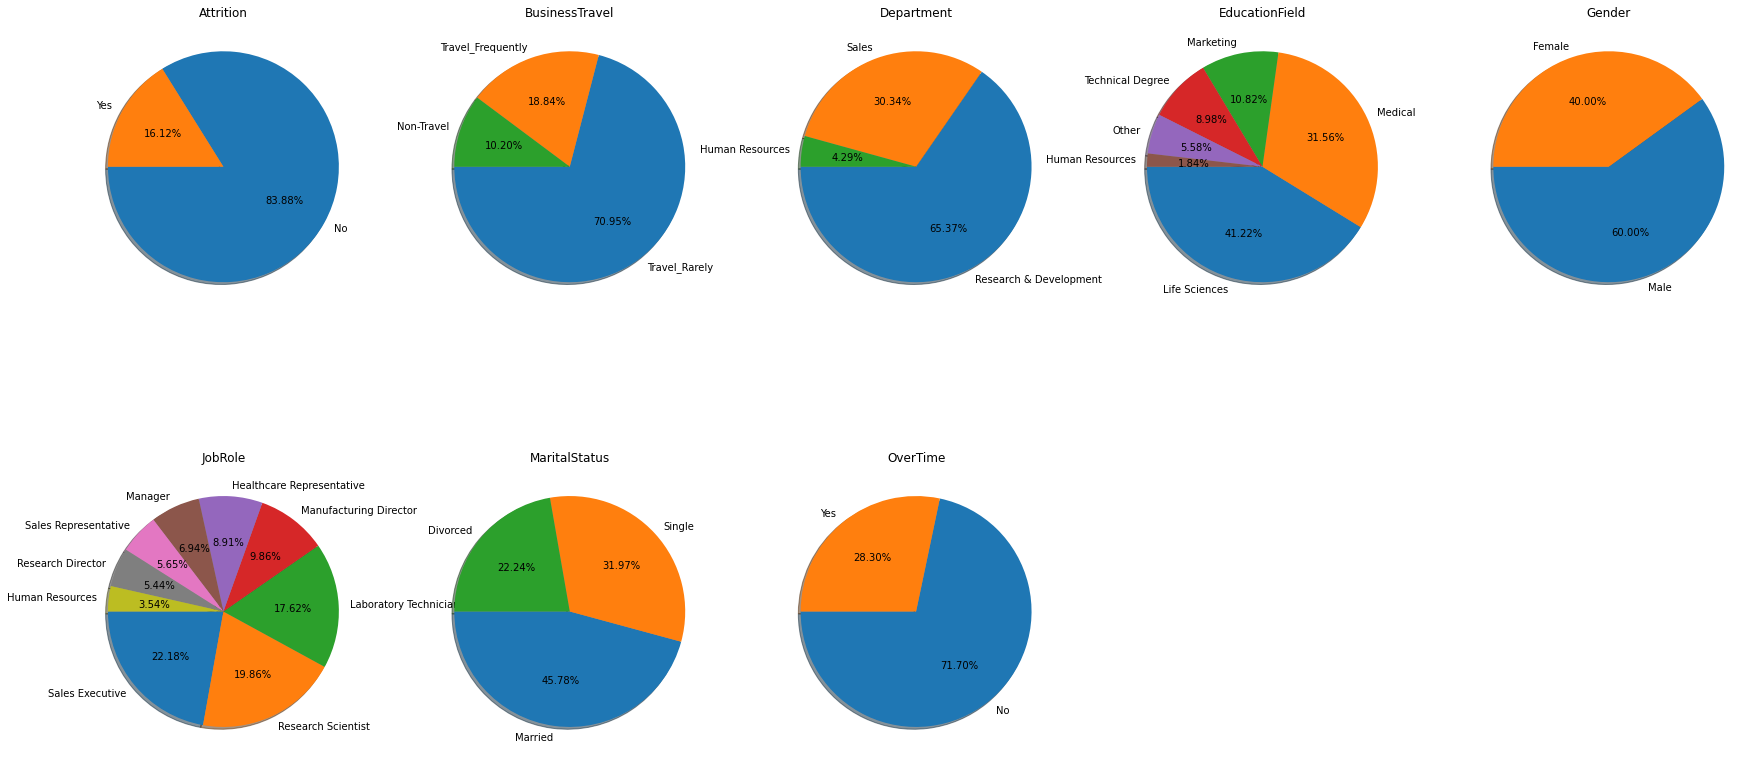

In [9]:
#getting big-picture view of value counts for nominal categorical variables
plt.figure(figsize=(30, 15))
for i, feature in enumerate(nominal_categorical):
    labels = data[feature].value_counts().index
    sizes = data[feature].value_counts().values
    ax = plt.subplot(2, 5, i+1)
    ax.pie(sizes, labels=labels, shadow=True, autopct='%.2f%%', startangle=180)
    plt.title(feature)

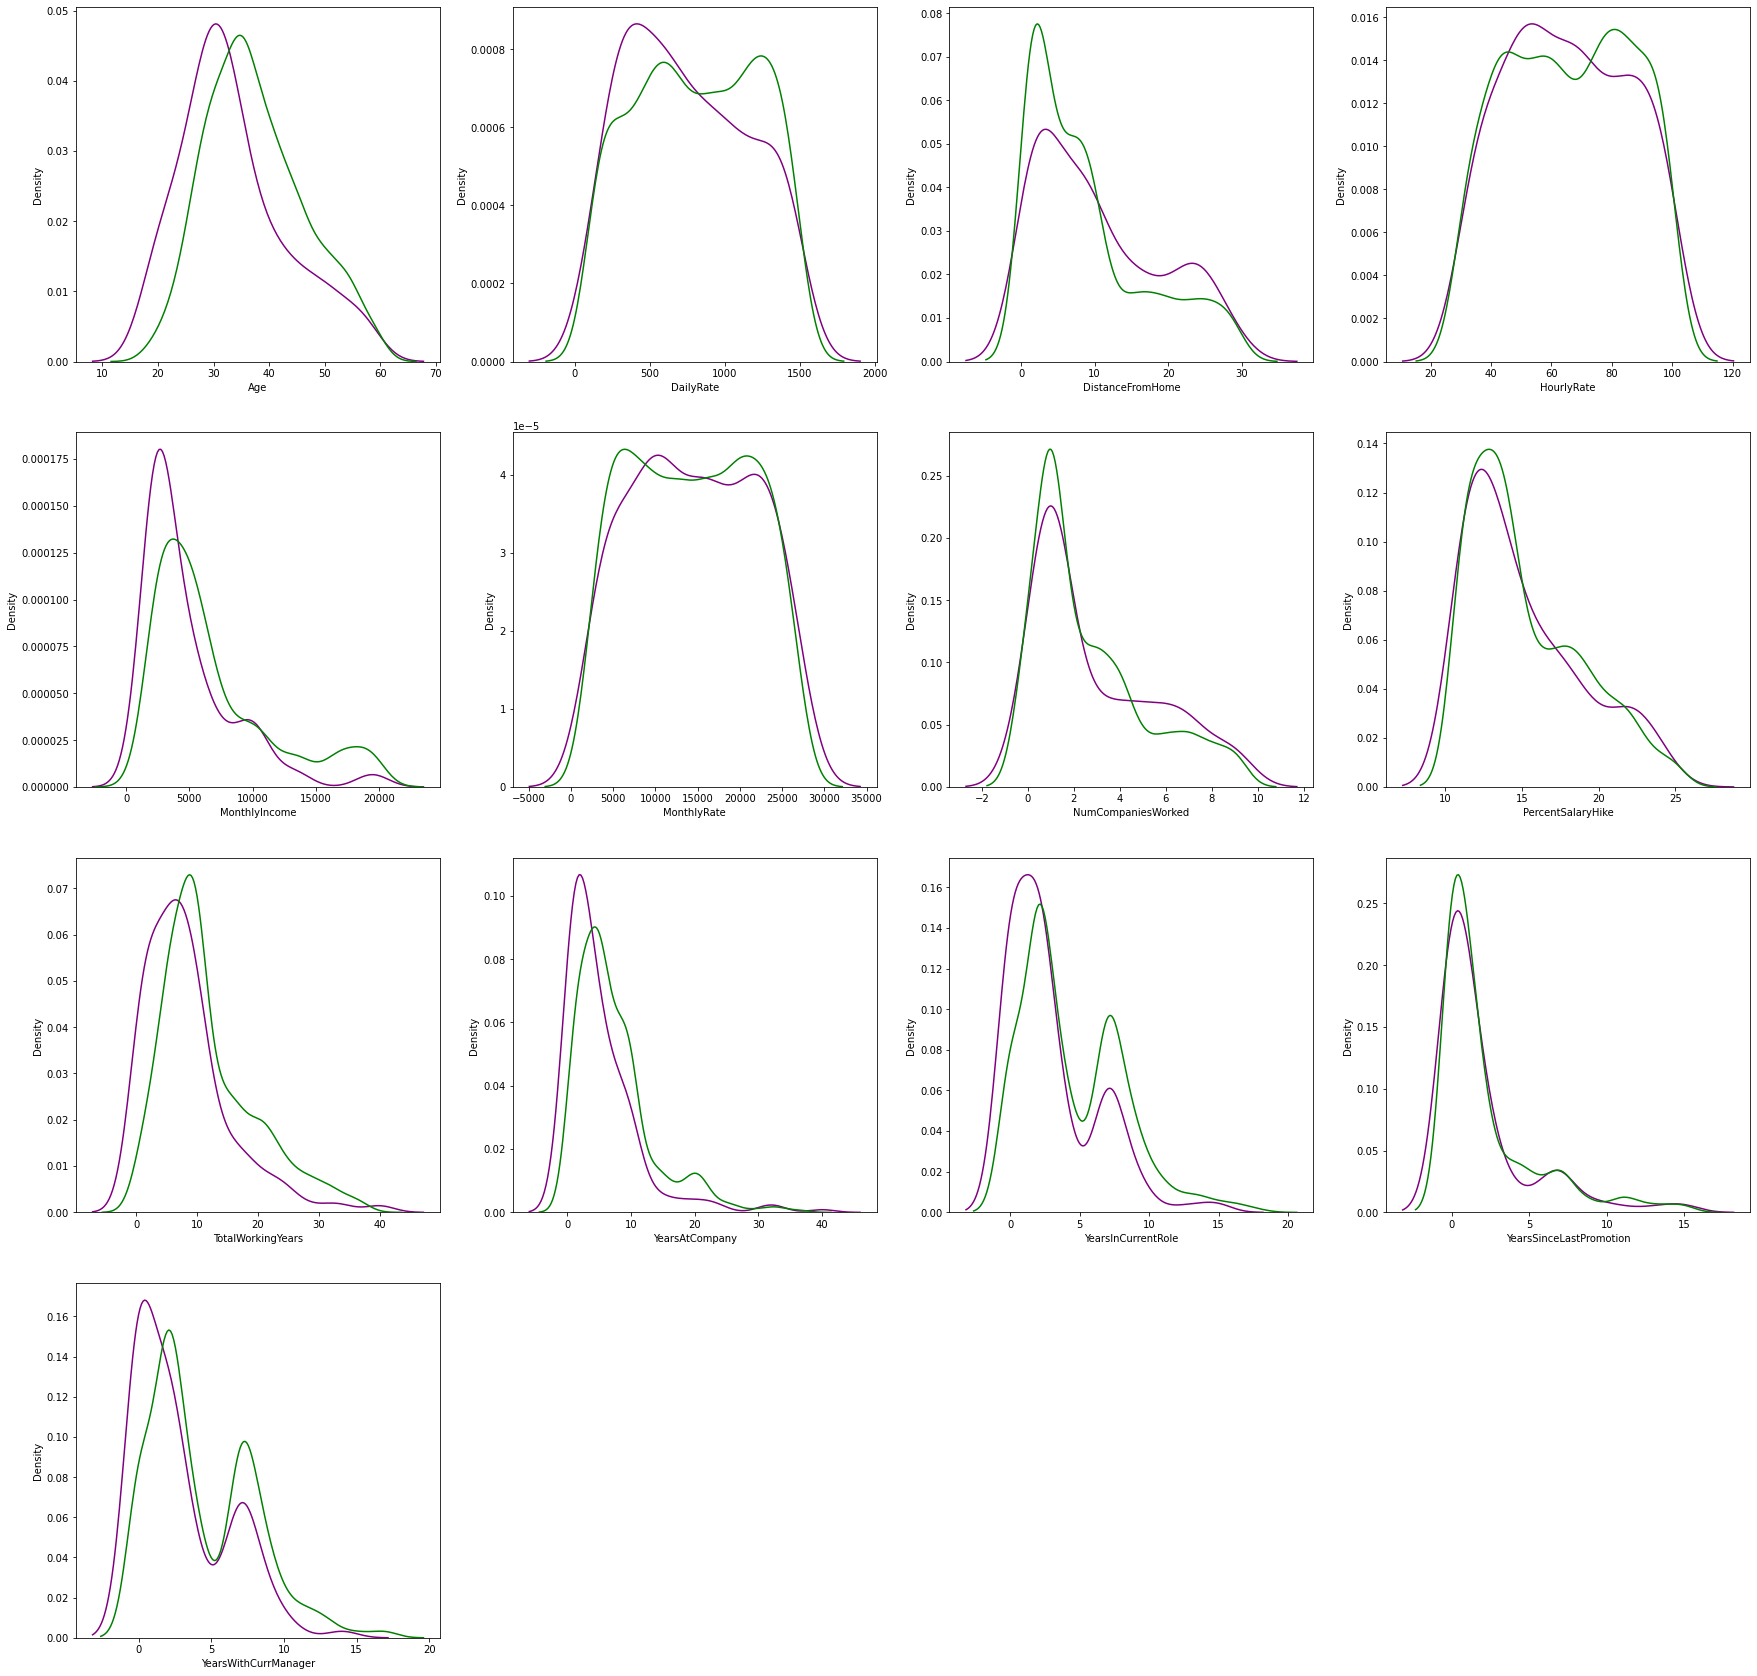

In [10]:
#getting distributions for numerical variables, separated by attrition
plt.figure(figsize=(30, 30))
for i, feature in enumerate(numerical):
    ax = plt.subplot(4, 4, i+1)
    sns.kdeplot(data.loc[data.Attrition=='Yes', feature], label = 'Turnover', color='purple')
    sns.kdeplot(data.loc[data.Attrition=='No', feature], label = 'Current Employee', color='green')

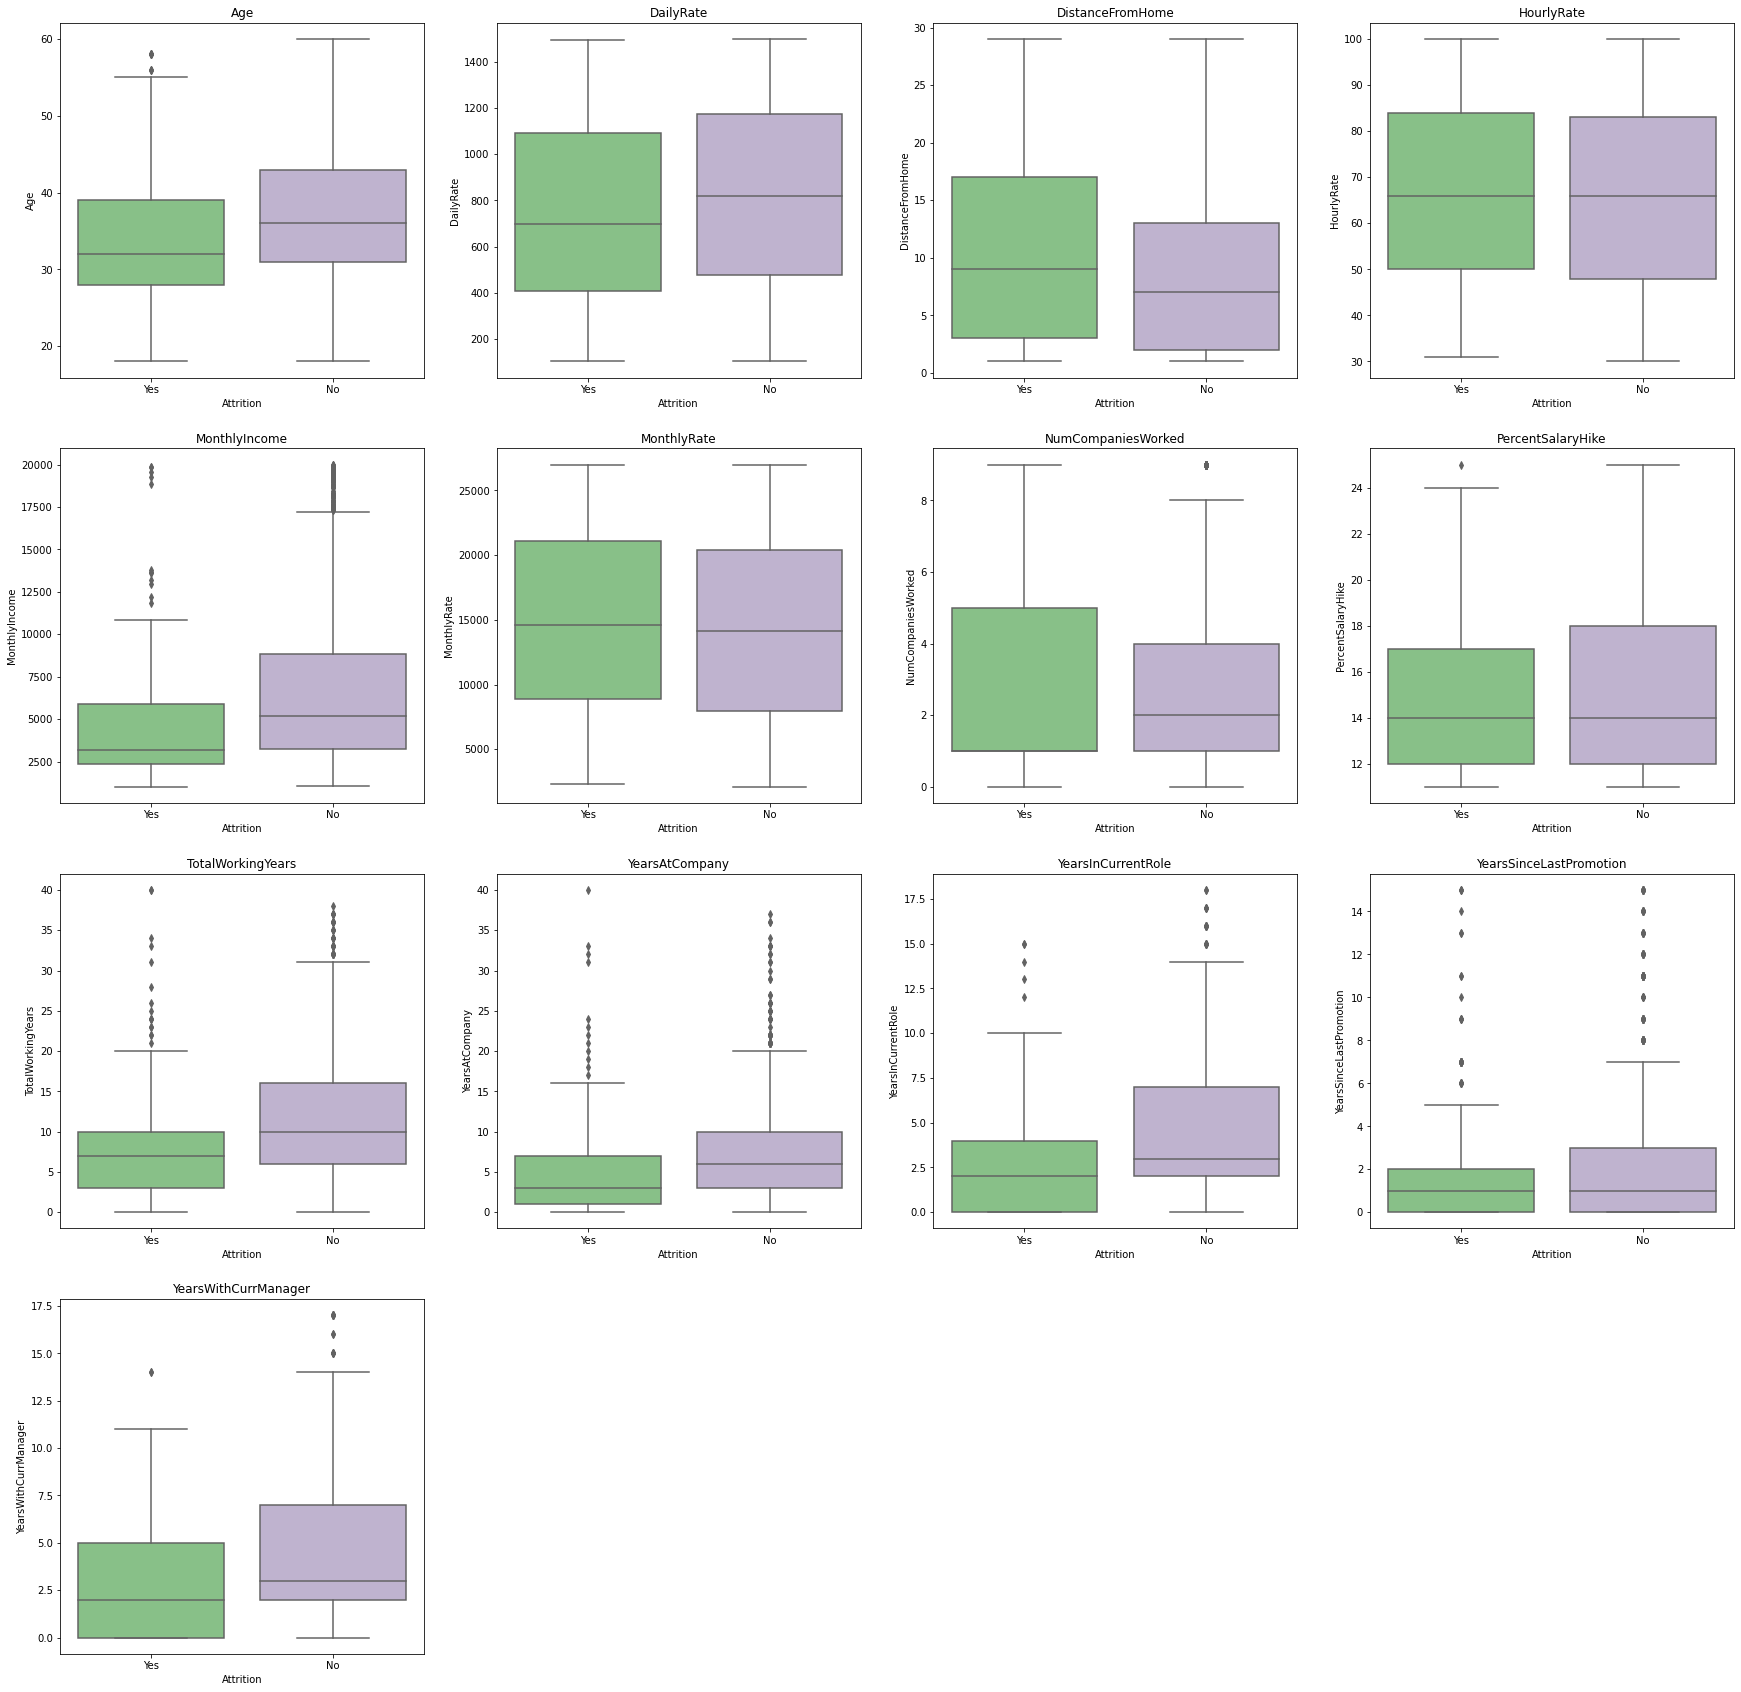

In [11]:
plt.figure(figsize=(30, 30))
for i, feature in enumerate(numerical):
    ax = plt.subplot(4, 4, i+1)
    sns.boxplot(x=data['Attrition'], y=data[feature], 
                palette='Accent')
    ax.set_title(feature)

In [12]:
#changing attrition column to numerical variable
data['Attrition']=data['Attrition'].map({'Yes': 1, 'No': 0})


# Exploratory Data Analysis

In this project, EDA was limited mainly to interactions with the target variable for the model (Attrition).

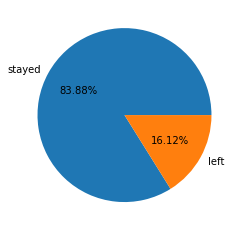

In [13]:
data.Attrition.value_counts()

plt.pie(data.Attrition.value_counts(), 
        labels=['stayed', 'left'], autopct='%.2f%%')
plt.show()

The binary class is imbalanced, meaning outcomes may need to be artificially balanced prior to model implementation.

In [14]:
data.groupby('Attrition').agg(['mean','median', 'std']).T

Attrition                                   0             1
Age                      mean       37.561233     33.607595
                         median     36.000000     32.000000
                         std         8.888360      9.689350
DailyRate                mean      812.504461    750.362869
                         median    817.000000    699.000000
                         std       403.208379    401.899519
DistanceFromHome         mean        8.915653     10.632911
                         median      7.000000      9.000000
                         std         8.012633      8.452525
Education                mean        2.927007      2.839662
                         median      3.000000      3.000000
                         std         1.027002      1.008244
EnvironmentSatisfaction  mean        2.771290      2.464135
                         median      3.000000      3.000000
                         std         1.071132      1.169791
HourlyRate               mean       65.952149     65.573840
                         median     66.000000     66.000000
                         std        20.380754     20.099958
JobInvolvement           mean        2.770479      2.518987
                         median      3.000000      3.000000
                         std         0.692050      0.773405
JobLevel                 mean        2.145985      1.637131
                         median      2.000000      1.000000
                         std         1.117933      0.940594
JobSatisfaction          mean        2.778589      2.468354
                         median      3.000000      3.000000
                         std         1.093277      1.118058
MonthlyIncome            mean     6832.739659   4787.092827
                         median   5204.000000   3202.000000
                         std      4818.208001   3640.210367
MonthlyRate              mean    14265.779400  14559.308017
                         median  14120.000000  14618.000000
                         std      7102.260749   7208.153264
NumCompaniesWorked       mean        2.645580      2.940928
                         median      2.000000      1.000000
                         std         2.460090      2.678519
PercentSalaryHike        mean       15.231144     15.097046
                         median     14.000000     14.000000
                         std         3.639511      3.770294
PerformanceRating        mean        3.153285      3.156118
                         median      3.000000      3.000000
                         std         0.360408      0.363735
RelationshipSatisfaction mean        2.733982      2.599156
                         median      3.000000      3.000000
                         std         1.071603      1.125437
StockOptionLevel         mean        0.845093      0.527426
                         median      1.000000      0.000000
                         std         0.841985      0.856361
TotalWorkingYears        mean       11.862936      8.244726
                         median     10.000000      7.000000
                         std         7.760719      7.169204
TrainingTimesLastYear    mean        2.832928      2.624473
                         median      3.000000      2.000000
                         std         1.293585      1.254784
WorkLifeBalance          mean        2.781022      2.658228
                         median      3.000000      3.000000
                         std         0.681907      0.816453
YearsAtCompany           mean        7.369019      5.130802
                         median      6.000000      3.000000
                         std         6.096298      5.949984
YearsInCurrentRole       mean        4.484185      2.902954
                         median      3.000000      2.000000
                         std         3.649402      3.174827
YearsSinceLastPromotion  mean        2.234388      1.945148
                         median      1.000000      1.000000
                         std         3.2

From kde plot visualizations and descriptives
- noticeably younger
- farther from home
- have a lower job level
- slightly lower job satisfaction 
- much less monthly income
- have worked at more companies (potentially job hoppers?)
- worked at the company for less years

Relationships of ordinal categorical variables with attrition:

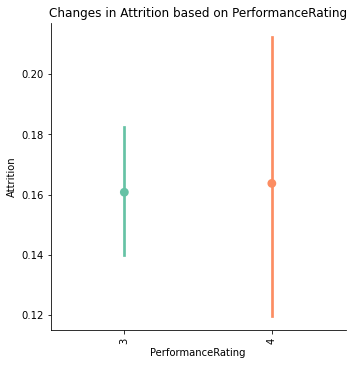

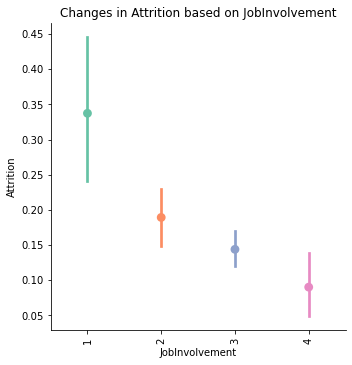

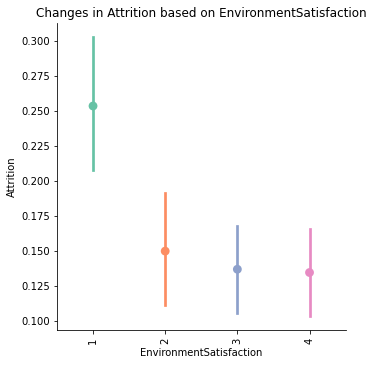

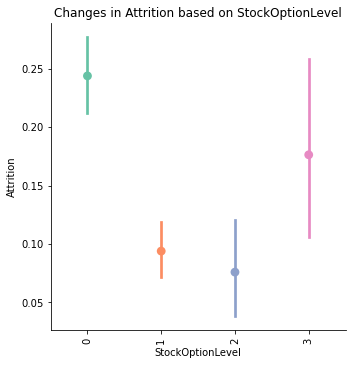

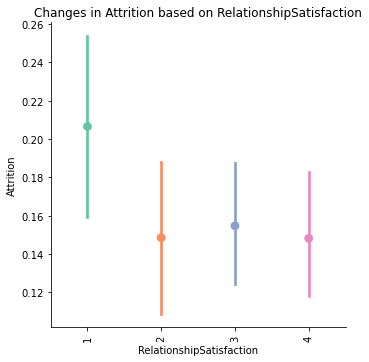

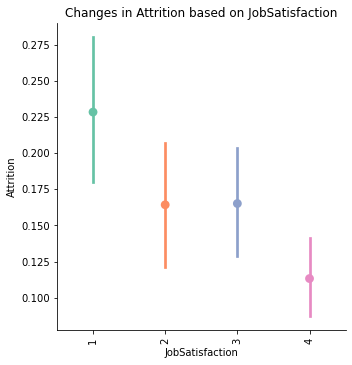

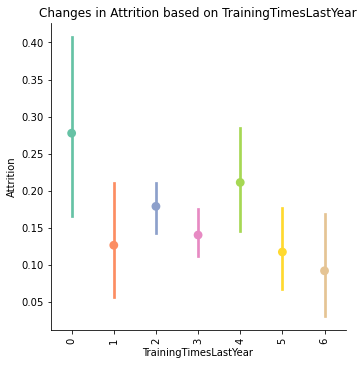

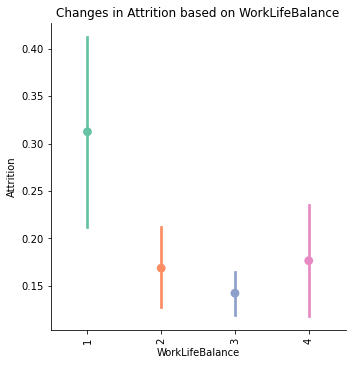

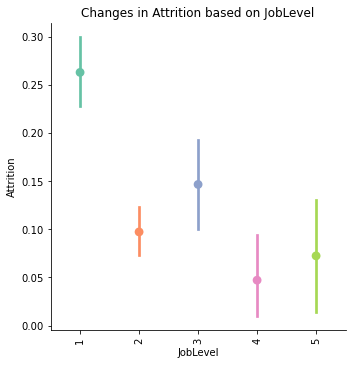

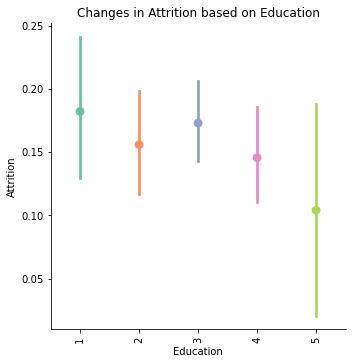

In [15]:
for column in data[ordinal_categorical]:
    sns.catplot(x=column, y='Attrition', data=data, kind='point', palette='Set2')
    plt.xticks(rotation=90)
    plt.title('Changes in Attrition based on {}'.format(column))


Overall takeaways:
- Multiple ordinal categorical features seem to have significantly different attrition rates between categories. 
- Job involvement, work life balance, relationship satisfaction, and job satisfaction all tend to follow similar curves, with those rating them the lowest having much higher rates than those rating these feature higher than 1. These features could be very inter-related. We can look into this a little more:

In [16]:
data[['JobSatisfaction', 'JobInvolvement', 'WorkLifeBalance', 'RelationshipSatisfaction']].corr()
#with only four possible values, these correlations can't be too reliable

,JobSatisfaction,JobInvolvement,WorkLifeBalance,RelationshipSatisfaction
JobSatisfaction,1.000000,-0.021476,-0.019459,-0.012454
JobInvolvement,-0.021476,1.000000,-0.014617,0.034297
WorkLifeBalance,-0.019459,-0.014617,1.000000,0.019604
RelationshipSatisfaction,-0.012454,0.034297,0.019604,1.000000


In [17]:
#we can see if for increasing levels of job satisfaction, levels of involvement, work life balance, and relationship satisfaction increase or decrease
job_satisfaction_1 = data[data.JobSatisfaction==1]
print(job_satisfaction_1[['JobSatisfaction', 'JobInvolvement', 'WorkLifeBalance', 'RelationshipSatisfaction']].agg('mean'))

job_satisfaction_2 = data[data.JobSatisfaction==2]
print(job_satisfaction_2[['JobSatisfaction', 'JobInvolvement', 'WorkLifeBalance', 'RelationshipSatisfaction']].agg('mean'))

job_satisfaction_3 = data[data.JobSatisfaction==3]
print(job_satisfaction_3[['JobSatisfaction', 'JobInvolvement', 'WorkLifeBalance', 'RelationshipSatisfaction']].agg('mean'))

job_satisfaction_4 = data[data.JobSatisfaction==4]
print(job_satisfaction_4[['JobSatisfaction', 'JobInvolvement', 'WorkLifeBalance', 'RelationshipSatisfaction']].agg('mean'))


JobSatisfaction             1.000000
JobInvolvement              2.761246
WorkLifeBalance             2.771626
RelationshipSatisfaction    2.730104
dtype: float64
JobSatisfaction             2.000000
JobInvolvement              2.728571
WorkLifeBalance             2.767857
RelationshipSatisfaction    2.735714
dtype: float64
JobSatisfaction             3.000000
JobInvolvement              2.726244
WorkLifeBalance             2.782805
RelationshipSatisfaction    2.696833
dtype: float64
JobSatisfaction             4.000000
JobInvolvement              2.714597
WorkLifeBalance             2.729847
RelationshipSatisfaction    2.701525
dtype: float64


Interestingly, despite these values having similar patterns regarding attrition rates between categories, according to correlations and across job satisfaction they are not significantly interrelated. I might have thought that those with low job satisfaction also had lower relationship satisfaction and work-life balance, but this does not appear to be the case. This does give evidence to changes of attrition being due more to the different factors themselves, not just a subset of people being very unhappy, putting 1 for several ordinal variables, and leaving the company.

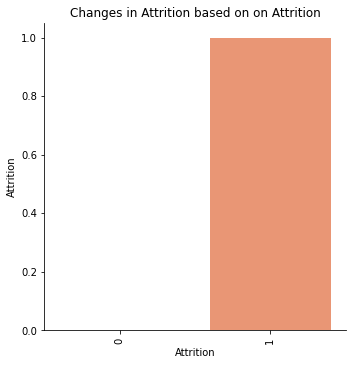

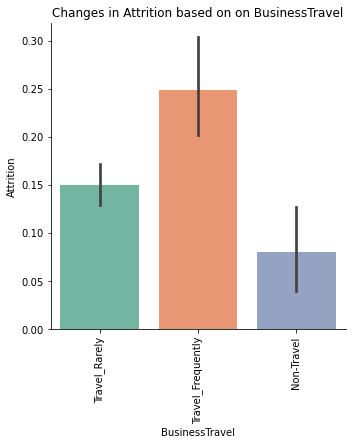

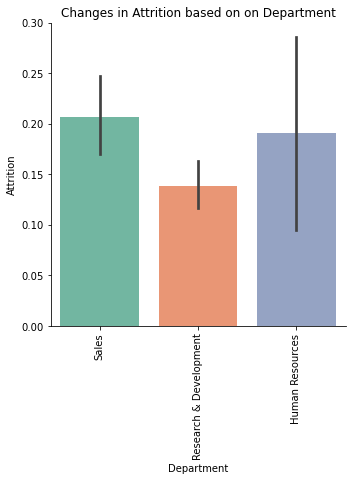

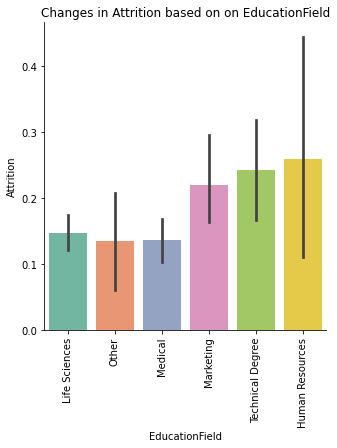

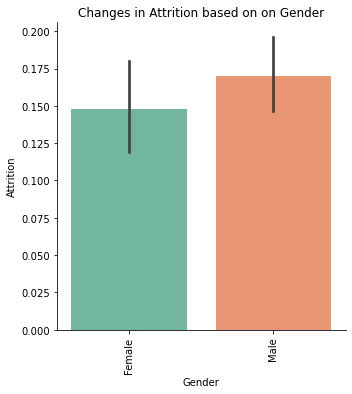

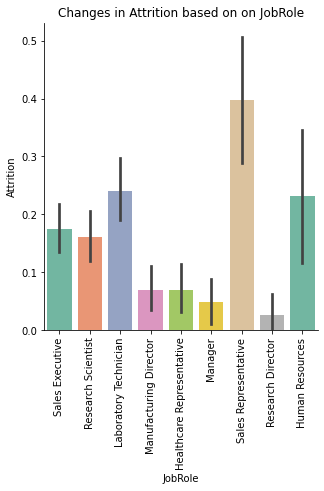

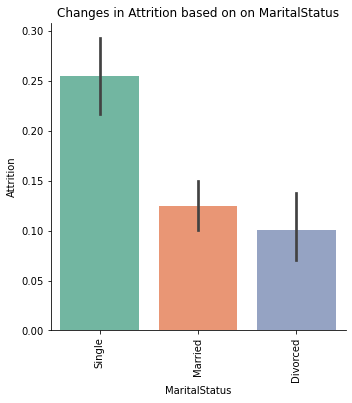

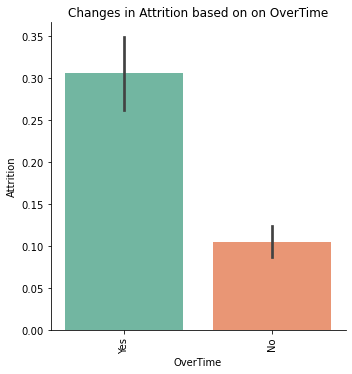

In [18]:
for column in data[nominal_categorical]:
    sns.catplot(x=column, y='Attrition', data=data, kind='bar', palette='Set2')
    plt.xticks(rotation=90)
    plt.title('Changes in Attrition based on on {}'.format(column))
    

Takeaways:
- people who travel frequently have much higher rates of turnover
- less turnover in Research and Development
- Science-based education employees tend to have much less turnover (something to include in feature engineering)
- Sales people, HR, and lab technicians account for most of the attrition by job role
- single people have much higher rates of attrition
- Overtime has an extremely large effect on attrition (3X the percentage)

In [19]:
#seeing how other variables might interact with over time

print(pd.crosstab(data['OverTime'], data['MaritalStatus'], margins=True, normalize='columns'))

print(pd.crosstab(data['OverTime'], data['Department'], margins=True, normalize='columns'))

print(pd.crosstab(data['OverTime'], data['JobInvolvement'], margins=True, normalize='columns'))



MaritalStatus  Divorced   Married    Single       All
OverTime                                             
No             0.697248  0.723626  0.721277  0.717007
Yes            0.302752  0.276374  0.278723  0.282993
Department  Human Resources  Research & Development     Sales       All
OverTime                                                               
No                 0.730159                0.718002  0.713004  0.717007
Yes                0.269841                0.281998  0.286996  0.282993
JobInvolvement         1     2         3         4       All
OverTime                                                    
No              0.698795  0.72  0.717742  0.715278  0.717007
Yes             0.301205  0.28  0.282258  0.284722  0.282993


In [20]:
c = pd.DataFrame(data.groupby(['JobRole', 'BusinessTravel']).Age.count())
percentage_table = (c*100)/c.groupby(level=0).sum()
percentage_table_pivot = percentage_table.pivot_table(percentage_table, columns='BusinessTravel', index='JobRole').merge(pd.DataFrame(data.groupby('JobRole').Attrition.mean()), on='JobRole').merge(pd.DataFrame(data.groupby('JobRole').MonthlyIncome.median()), on='JobRole')
pt = percentage_table_pivot.merge(pd.DataFrame(data.groupby('JobRole').Age.mean()), on='JobRole').sort_values(by='Attrition')
pt = pt.set_axis(['non-travel', 'travel_frequently', 'travel_rarely', 'attrition', 'monthlyincome', 'age'], axis=1)
pt['travel_percentage'] = pt['travel_frequently'] + pt['travel_rarely']
pt = pt.drop(columns=['non-travel', 'travel_frequently', 'travel_rarely'])
pt


/Users/jordanbritt/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:9190: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left,1 on the right)
  return merge(


,attrition,monthlyincome,age,travel_percentage
JobRole,,,,
Research Director,0.025000,16510.0,44.000000,92.500000
Manager,0.049020,17454.5,46.764706,88.235294
Healthcare Representative,0.068702,6811.0,39.809160,88.549618
Manufacturing Director,0.068966,6447.0,38.296552,91.034483
Research Scientist,0.160959,2887.5,34.236301,90.410959
Sales Executive,0.174847,6231.0,36.889571,88.036810
Human Resources,0.230769,3093.0,35.500000,92.307692
Laboratory Technician,0.239382,2886.0,34.096525,89.189189
Sales Representative,0.397590,2579.0,30.361446,93.975904


In [21]:
pt.corr()

,attrition,monthlyincome,age,travel_percentage
attrition,1.000000,-0.726256,-0.873198,0.451309
monthlyincome,-0.726256,1.000000,0.942770,-0.195247
age,-0.873198,0.942770,1.000000,-0.390098
travel_percentage,0.451309,-0.195247,-0.390098,1.000000


In [22]:
print('Attrition percentage for those with below median income: \n',
        np.round(data.loc[data.MonthlyIncome<4919].Attrition.mean()*100,2),'%')
print('Attrition percentage for those with above median income: \n',
      np.round(data.loc[data.MonthlyIncome>4919].Attrition.mean()*100,2),'%')

Attrition percentage for those with below median income: 
 21.77 %
Attrition percentage for those with above median income: 
 10.48 %


# Feature Engineering for Classification Models

In [23]:
data.loc[(data.MaritalStatus=='Single')&(data.MonthlyIncome<np.percentile(data.MonthlyIncome, 40)), 'Single_NonWealthy']=1
data.Single_NonWealthy.fillna(0, inplace=True)

In [24]:
data['JobHopIndex'] = (data['NumCompaniesWorked']+1)/(data['TotalWorkingYears']+1)

In [25]:
data.loc[(data.JobRole=='Research Scientist')|
         (data.JobRole=='Laboratory Technician')|
         (data.JobRole=='Research Director'), 'Scientific']='True'
data.Scientific.fillna("False", inplace=True)

In [26]:
def get_leadership(data1):
    if data1.JobRole=='Manager':
        return 'Leadership'
    if data1.JobRole=='Research Director':
        return 'Leadership'
    if data1.JobRole=='Manufacturing Director':
        return 'Leadership'
    else:
        return 'Non-Leadership'

data['LeadershipRole']=data.apply(lambda data: get_leadership(data), axis=1)
data.groupby('LeadershipRole').Attrition.mean()
    

LeadershipRole
Leadership        0.051988
Non-Leadership    0.192476
Name: Attrition, dtype: float64

In [27]:
data.groupby('Attrition').JobHopIndex.describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
0,1233.0,0.372540,0.321854,0.025641,0.166667,0.272727,0.461538,2.25
1,237.0,0.619198,0.468212,0.028571,0.240000,0.500000,1.000000,2.50


# Preparing Data for Model

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   int64  
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EnvironmentSatisfaction   1470 non-null   int64  
 9   Gender                    1470 non-null   object 
 10  HourlyRate                1470 non-null   int64  
 11  JobInvolvement            1470 non-null   int64  
 12  JobLevel                  1470 non-null   int64  
 13  JobRole                   1470 non-null   object 
 14  JobSatis

In [29]:
#helping normalize skewed numerical variables
for column in numerical:
    if data[column].skew() > .75:
        data[column] = np.log(data[column] + 1)

In [30]:
data[numerical].skew()

Age                        0.413286
DailyRate                 -0.003519
DistanceFromHome          -0.029121
HourlyRate                -0.032311
MonthlyIncome              0.286448
MonthlyRate                0.018578
NumCompaniesWorked         0.092896
PercentSalaryHike          0.513543
TotalWorkingYears         -0.622175
YearsAtCompany            -0.207708
YearsInCurrentRole        -0.383498
YearsSinceLastPromotion    0.718805
YearsWithCurrManager      -0.357686
dtype: float64

In [31]:
#ordinal encoding for ordinal categorical text variables
data.BusinessTravel = data.BusinessTravel.map({'Non-Travel':0, 'Travel_Rarely':1, 'Travel_Frequently':2})
data.OverTime = data.OverTime.map({'Yes':1, 'No': 0})
data.LeadershipRole = data.LeadershipRole.map({'Leadership': 1, 'Non-Leadership': 0})
data.Scientific = data.Scientific.map({'True': 1, 'False': 0})





In [32]:
#One-Hot Encoding for Categorical Variables
data = pd.get_dummies(data, columns=['Department', 'Gender', 'MaritalStatus'])

In [33]:
def calc_smooth_mean(data, by, on, m):
    #Compute the global mean
    mean = data[on].mean()
    
    #Compute the number of values and the mean for each group
    agg = data.groupby(by)[on].agg(['count','mean'])
    counts = agg['count']
    means = agg['mean']
    smooth = (counts*means + (m*mean))/(counts+m)
    return data[by].map(smooth)
data['JobRole'] = calc_smooth_mean(data, 'JobRole', 'Attrition', 200)
data['EducationField'] = calc_smooth_mean(data, 'EducationField', 'Attrition', 200)

In [34]:
#seeing which variables are most correlated with attrition
data.drop('Attrition', axis = 1).corrwith(data.Attrition).sort_values()


TotalWorkingYears                   -0.230891
YearsAtCompany                      -0.198467
MonthlyIncome                       -0.198201
YearsWithCurrManager                -0.190667
YearsInCurrentRole                  -0.187618
JobLevel                            -0.169105
Age                                 -0.159205
LeadershipRole                      -0.158884
StockOptionLevel                    -0.137145
JobInvolvement                      -0.130016
JobSatisfaction                     -0.103481
EnvironmentSatisfaction             -0.103369
MaritalStatus_Married               -0.090984
MaritalStatus_Divorced              -0.087716
Department_Research & Development   -0.085293
WorkLifeBalance                     -0.063939
TrainingTimesLastYear               -0.059478
DailyRate                           -0.056652
YearsSinceLastPromotion             -0.048475
RelationshipSatisfaction            -0.045872
Education                           -0.031373
Gender_Female                     

In [35]:
#assessing collinearity
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
collinear_columns = [column for column in upper.columns if any(upper[column] > .85)]
collinear_columns

#given the columns that are collinear, we won't remove any

/var/folders/q5/rk21gzmd3yndf_3sb7wt4bjm0000gn/T/ipykernel_86055/804543744.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


['MonthlyIncome', 'Department_Sales', 'Gender_Male']

In [36]:
#scaling data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = data.copy()
for column in data_scaled.columns:
    data_scaled[column] = data_scaled[column].astype('float64')
    data_scaled[column] = scaler.fit_transform(data_scaled[[column]])

data_scaled.head()

    

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Single_NonWealthy,JobHopIndex,Scientific,LeadershipRole,Department_Human Resources,Department_Research & Development,Department_Sales,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.547619,1.0,0.5,0.715820,0.000000,0.25,0.139547,0.333333,0.914286,0.666667,0.25,0.437566,1.000000,0.596430,0.698053,0.954243,1.0,0.000000,0.0,0.000000,0.000000,0.591674,0.0,0.000000,0.524000,0.546603,0.000000,0.619906,0.0,0.393782,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,0.738095,0.0,1.0,0.126700,0.555410,0.00,0.139547,0.666667,0.442857,0.333333,0.25,0.358113,0.333333,0.544363,0.916001,0.301030,0.0,0.896477,1.0,1.000000,0.333333,0.645711,0.5,0.666667,0.645711,0.706227,0.250000,0.719437,0.0,0.063118,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.452381,1.0,0.5,0.909807,0.149726,0.25,0.197924,1.000000,0.885714,0.333333,0.00,0.767001,0.666667,0.243719,0.012126,0.845098,1.0,0.372072,0.0,0.333333,0.000000,0.559957,0.5,0.666667,0.000000,0.000000,0.000000,0.000000,1.0,0.343264,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.357143,0.0,1.0,0.923407,0.255958,0.75,0.139547,1.000000,0.371429,0.666667,0.00,0.358113,0.666667,0.354414,0.845814,0.301030,1.0,0.000000,0.0,0.666667,0.000000,0.591674,0.5,0.666667,0.591674,0.706227,0.500000,0.000000,0.0,0.079447,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.214286,0.0,0.5,0.350036,0.149726,0.00,0.000000,0.000000,0.142857,0.666667,0.00,0.767001,0.333333,0.413264,0.583738,1.000000,0.0,0.103523,0.0,1.000000,0.333333,0.524000,0.5,0.666667,0.295837,0.373114,0.396241,0.380094,0.0,0.566987,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [37]:
data_scaled.shape

(1470, 40)

In [38]:
y = data_scaled['Attrition'].values
X=data_scaled.drop('Attrition', axis=1)

In [62]:
#feature selection with RFE (Recursive feature elimination)
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
rfe = RFE(LogisticRegression(C=2.1, penalty='l2',  solver='liblinear'),n_features_to_select=20)
rfe = rfe.fit(X, y)
print('Features selected:', X.columns[rfe.support_])
feature_selection_columns = X.columns[rfe.support_]

Features selected: Index(['Age', 'BusinessTravel', 'DistanceFromHome', 'EducationField',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'JobHopIndex', 'MaritalStatus_Single'],
      dtype='object')


In [74]:
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from collections import Counter

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=21)

smt = SMOTETomek(random_state=21)
x_train, y_train = smt.fit_resample(x_train, y_train)
print("Number transactions X_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print('Resampled dataset shape %s' % Counter(y_train))

Number transactions X_train dataset:  (1844, 39)
Number transactions y_train dataset:  (1844,)
Resampled dataset shape Counter({0.0: 922, 1.0: 922})


                          Accuracy  Precision    Recall        F1
Logistic Regression           0.81   0.432692  0.559006  0.789474
Decision Tree Classifier      0.79   0.351351  0.396947  0.456140
Random Forest Classifier      0.88   0.709677  0.500000  0.385965
XGBClassifier                 0.89   0.742857  0.565217  0.456140


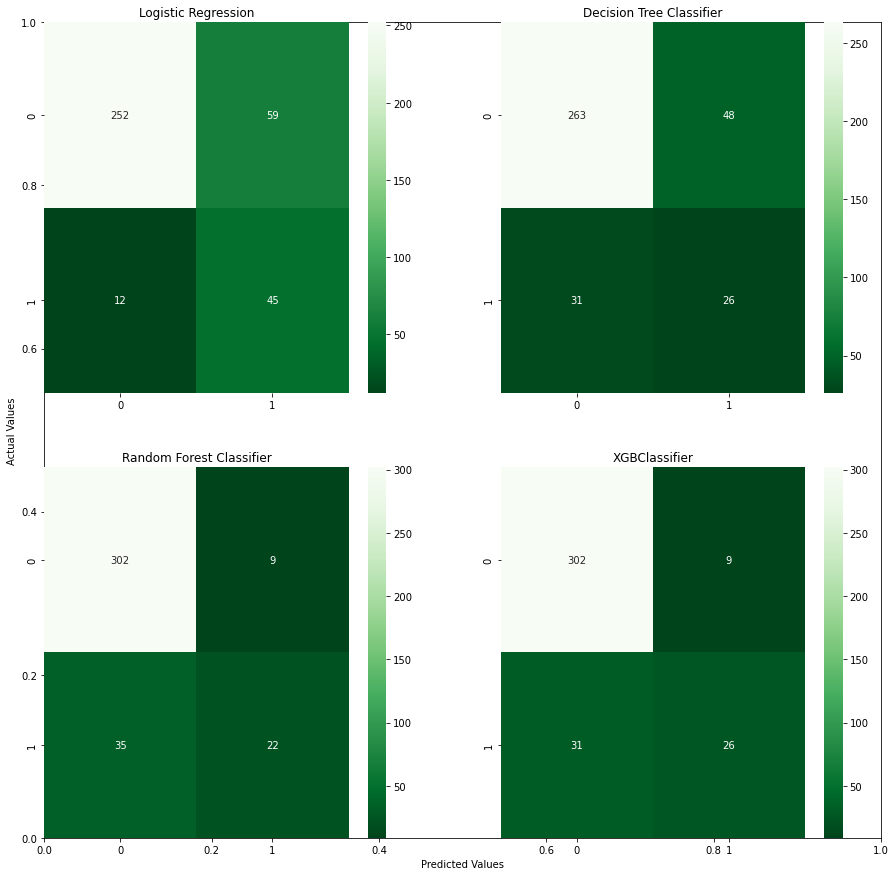

In [64]:

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_curve, recall_score, precision_score, classification_report

def get_predictions(model_list, models):
    acc=[]
    cm=[]
    recall = []
    f1 = []
    precision = []
    for model in model_list:
        model.fit(x_train, y_train)
        predictions=model.predict(x_test)
        acc.append(round(accuracy_score(y_test, predictions),2))
        cm.append(confusion_matrix(y_test, predictions))
        recall.append(f1_score(y_test, predictions))
        f1.append(recall_score(y_test, predictions))
        precision.append(precision_score(y_test, predictions))
    performance = pd.DataFrame([acc, precision, recall, f1], columns=models).T
    performance.columns = ['Accuracy', 'Precision', 'Recall', 'F1']
    print(performance)
    fig, ax = plt.subplots(figsize=(15, 15))
    for i in range(0, len(cm)):
        cm_plot = cm[i]
        fig.add_subplot(2, 2, i+1)
        plot = sns.heatmap(cm_plot, annot=True,  cmap='Greens_r', fmt='g')
        plt.title(models[i])
        ax.set(xlabel='Predicted Values', ylabel='Actual Values')



from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


model_list = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), XGBClassifier()]
models=['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'XGBClassifier']

get_predictions(model_list, models)



                          Accuracy  Precision    Recall        F1
Logistic Regression           0.78   0.394737  0.526316  0.789474
Decision Tree Classifier      0.82   0.432432  0.488550  0.561404
Random Forest Classifier      0.87   0.625000  0.449438  0.350877
XGBClassifier                 0.87   0.609756  0.510204  0.438596


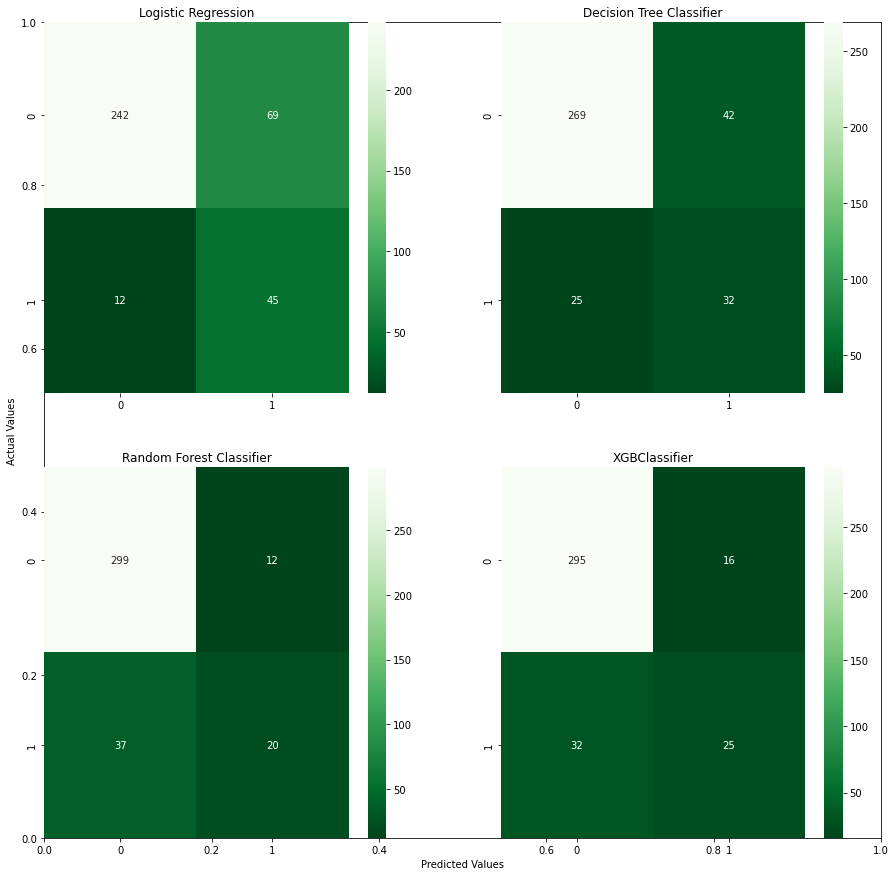

In [65]:
# model performance with recursive feature selection:
x_train, x_test, y_train, y_test = train_test_split(X[feature_selection_columns], y, test_size=.25, random_state=21)

smt = SMOTETomek(random_state=21)
x_train, y_train = smt.fit_resample(x_train, y_train)

get_predictions(model_list, models)


The XGBoost Classifier seems to have the highest performance by far. Hyper-parameter tuning:

In [71]:
from sklearn.model_selection import GridSearchCV
tuning = GridSearchCV(XGBClassifier(), param_grid = {
    'eta': np.linspace(0.001, 0.5, 2, 20),
    'n_estimators': [100, 250, 500],
    'max_depth': [4, 5, 6],
    'min_child_weight': [2, 3, 4]}, cv = 2, return_train_score = True)
tuning.fit(X, y)

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'eta': array([0.001, 0.5  ]), 'max_depth': [4, 5, 6],
                         'min_child_weight': [2, 3, 4],
                         'n_estimators': [100, 250, 500]},
             return_train_score=True)

In [72]:
tuning.best_params_

{'eta': 0.5, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 100}

In [82]:
#getting performance statistics for final model
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=21)

smt = SMOTETomek(random_state=21)
x_train, y_train = smt.fit_resample(x_train, y_train)

model = XGBClassifier(eta = .5, n_estimators = 100, max_depth = 4, min_child_weight = 2)
model.fit(x_train, y_train)
predictions=model.predict(x_test)

print(confusion_matrix(y_test, predictions))
pd.DataFrame({'Accuracy': accuracy_score(y_test, predictions),
'Precision': precision_score(y_test, predictions),
'Recall': recall_score(y_test, predictions),
'F1': f1_score(y_test, predictions)}, index=[0])



[[299  12]
 [ 32  25]]


,Accuracy,Precision,Recall,F1
0,0.880435,0.675676,0.438596,0.531915


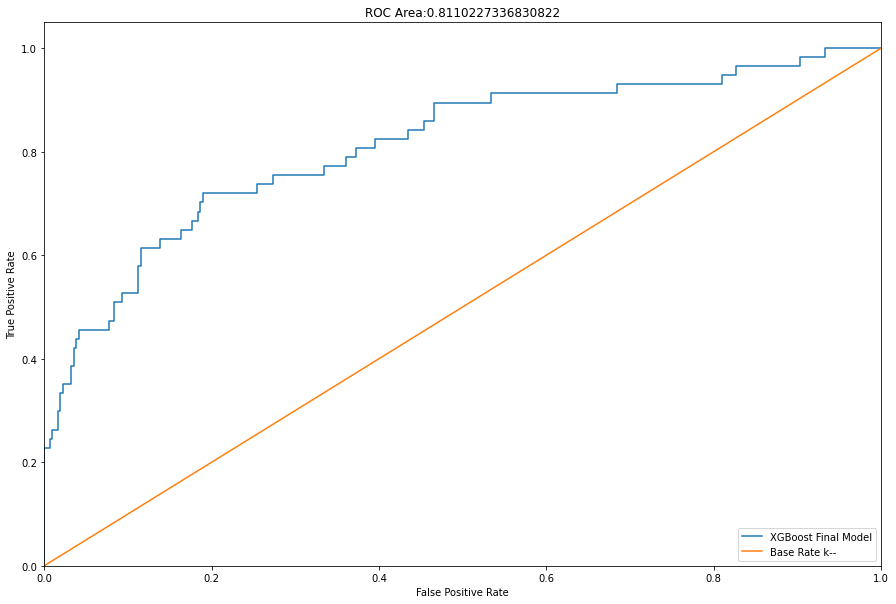

In [104]:
#roc curve for final model
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
roc_area = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
plt.figure(figsize=(15, 10))
plt.plot(fpr, tpr, label = 'XGBoost Final Model')

plt.plot([0,1], [0,1],label='Base Rate' ' k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Area:{roc_area}')
plt.legend(loc="lower right")
plt.show()

Overall, in thinking of employee turnover as a binary classification problem, we can use advanced packages and models to generate, at least with this data, a fairly robust model to predict which employees will stay and leave. Putting employees into a category of staying or leaving could allow for targeted interventions to retain potential leavers before it's too late.